In [ ]:
import pandas as pd #biblioteca utilizada para trabalhar com dataframes
import numpy as np #biblioteca utilizada no tratamento de matrizes e vetores
import seaborn as sn #biblioteca utilizada pra plotar os gráficos em um formato mais "elegante"
import matplotlib.pyplot as plt  #biblioteca utilizada para plotar os gráficos

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
df_vinhos = pd.read_csv('winequality-red.csv', sep=';' ) #carregamento do df 

In [ ]:
df_vinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df_vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


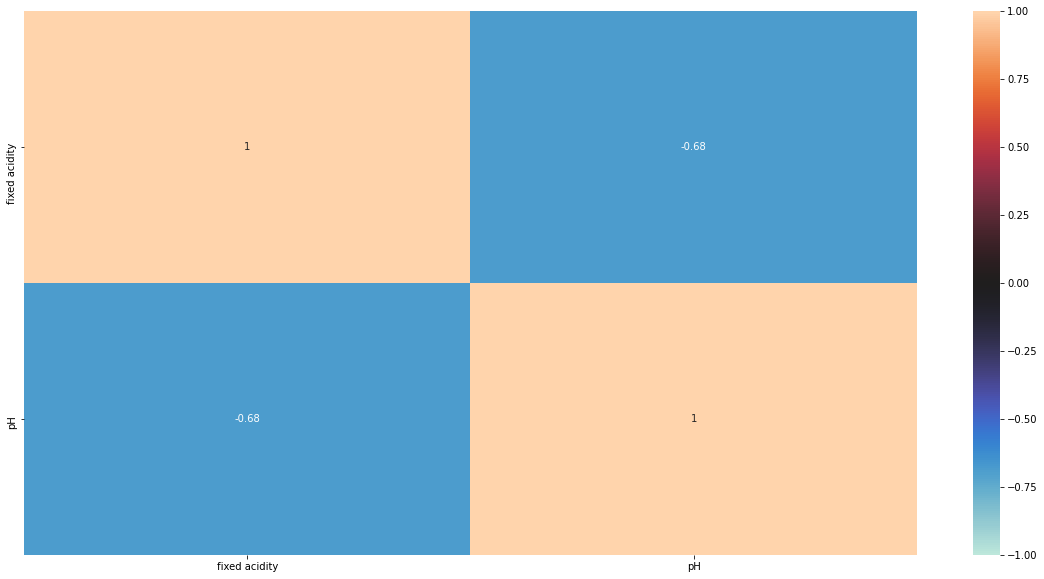

In [ ]:
df_vinhs_cor = df_vinhos[["fixed acidity", "pH"]] #matriz de corelacao entre fixed acidity e ph
plt.figure(figsize=(20, 10))
matriz_de_correlação = df_vinhs_cor.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

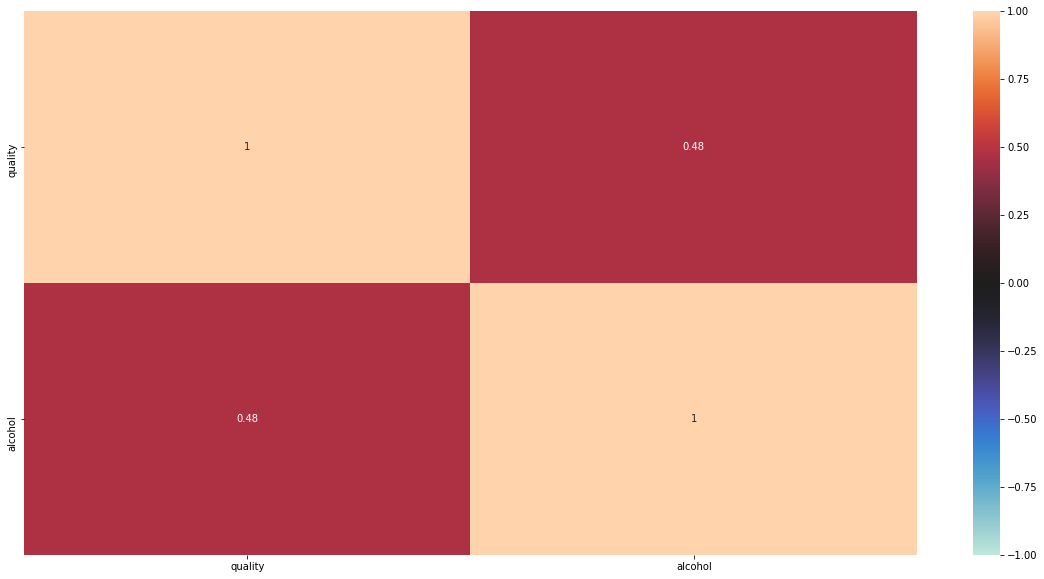

In [ ]:
df_vinhs_cor2 = df_vinhos[["quality", "alcohol"]] #matriz de correlacao entre quality e alcohol
plt.figure(figsize=(20, 10))
matriz_de_correlação = df_vinhs_cor2.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [ ]:
df_vinhos["quality"].eq(5).sum() #quantidade de vinhos com a qualidade = 5

681

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler() #normaliza o df com valores entre 0 e 1
df_vinhos_norm = scaler.fit_transform(df_vinhos)
print(df_vinhos_norm)

[[0.24778761 0.39726027 0.         ... 0.13772455 0.15384615 0.4       ]
 [0.28318584 0.52054795 0.         ... 0.20958084 0.21538462 0.4       ]
 [0.28318584 0.43835616 0.04       ... 0.19161677 0.21538462 0.4       ]
 ...
 [0.15044248 0.26712329 0.13       ... 0.25149701 0.4        0.6       ]
 [0.11504425 0.35958904 0.12       ... 0.22754491 0.27692308 0.4       ]
 [0.12389381 0.13013699 0.47       ... 0.19760479 0.4        0.6       ]]


In [ ]:
df_vinhos.nsmallest(3, "fixed acidity", keep='first') #menores valores de fixed acidity

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7


In [ ]:
print(df_vinhos_norm[45][0]) #menor valor de fixed acidity após a normalizacao

0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = df_vinhos.iloc[:, :-1].values #divide a entrada e saida
Y = df_vinhos.iloc[:, 11].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) # divide valores pra treinamento e teste

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.5708333333333333

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão

In [ ]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

#Acuracia da predicao
accuracy_score(y_test, y_pred)

0.59375

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta = clf_floresta.fit(X_train,y_train)
y_pred = clf_floresta.predict(X_test)
accuracy_score(y_test, y_pred)

0.68125

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm = clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.6104166666666667

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp = clf_mlp.fit(X_train,y_train)
y_pred = clf_mlp.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5666666666666667

In [ ]:
df_vinhos["quality"].replace(3, 0, inplace=True) <=5 -> 0(ruim)
df_vinhos["quality"].replace(4, 0, inplace=True)  >5 -> 1(bom)
df_vinhos["quality"].replace(5, 0, inplace=True)
df_vinhos["quality"].replace(6, 1, inplace=True)
df_vinhos["quality"].replace(7, 1, inplace=True)
df_vinhos["quality"].replace(8, 1, inplace=True)

In [ ]:
df_vinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
X = df_vinhos.iloc[:, :-1].values #divide a entrada e saida
Y = df_vinhos.iloc[:, 11].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) # divide valores pra treinamento e teste
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta = clf_floresta.fit(X_train,y_train)
y_pred = clf_floresta.predict(X_test)
accuracy_score(y_test, y_pred)

0.8041666666666667